# Estimation of Delta for the "simple" quantum system

## Initialize parameters, operators, etc...

In [2]:
from random import *
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [3]:
#Parameters
dt=0.05
omega=1
delta=3
gamma=1

#Time and deltas
t0=0
tf=30
nt=int((tf-t0)/dt)
t=np.linspace(t0,tf,nt)
print(nt)

Ntraj=10000 #Total number of trajectories
nu=100 #Number of measurements per set
nsets=int(Ntraj/nu) #Number of sets
print("Nu=",nu)
print("Nsets=",nsets)

ndelta=201 #Number of deltas inside the estimation range
Deltamin=0
Deltamax=10
Deltalist=np.linspace(Deltamin,Deltamax,ndelta) #Estimation range
dDelta=Deltalist[1]-Deltalist[0]
print("Pixel size for predicting delta=",dDelta)

#Initial value for the density matrix
rho0=np.array([1,0,0,0],float) 

#Operators
a=np.array([[0,1],[0,0]],float)
ata=np.dot(np.transpose(a),a)
H=np.array([[0,omega],[omega,delta]],float)
Heff=H-1j*gamma/2*ata
M=expm(-1j*dt*Heff) 
Id=np.eye(2)
J=gamma*np.kron(a,a) #Jump operator


def S(x):  #Operator for the evolution without jumps
    HH=np.array([[0,omega],[omega,x]],float)
    
    LJ=1j*(np.kron(Id,np.transpose(HH))-np.kron(HH,Id))-\
    gamma/2*(np.kron(ata,Id)+np.kron(Id,np.transpose(ata)))
    
    return expm(LJ*dt)

#We calculate the S operator in advanced for all possible delta values
Svec = []
for q in range(ndelta):
    Svec.append(S(Deltalist[q]))

#Prepare arrays to save later calculations
Nmean=np.zeros([nsets,nt],float)
Deltamean=np.zeros([nsets,nt],float)

600
Nu= 100
Nsets= 100
Pixel size for predicting delta= 0.05


## We generate trajectories with the Monte Carlo method, apply Bayesian inference and save the results

In [85]:
for w in range(0,nsets): #Loop over sets
    count=0
    Njumps=np.zeros([nu,nt],int)
    prob=np.zeros([nu,ndelta,nt],float)
    for j in range(0,nu): #Loop over measurements inside a set  
        count=0
        jumps=[]
        ket=np.zeros([2,nt],complex)
        ket[0,0]=np.sqrt(rho0[0]) #Define initial kets based on density matrix 
        ket[1,0]=np.sqrt(rho0[3]) 
  
        #Quantum Jumps Method
        for i in range(nt-1): #Loop over times
            dP=gamma*dt*np.dot(np.transpose(np.conjugate(ket[:,i])),np.dot(ata,ket[:,i]))
            r=random()
            
            if r<dP: #Jump
                ket[:,i+1]=np.dot(a,ket[:,i])
                ket[:,i+1]=ket[:,i+1]/np.linalg.norm(ket[:,i+1])
                count=count+1
                Njumps[j,i]=count 
                jumps.append(i)   
                
            else:    #No jump
                ket[:,i+1]=np.dot(M,ket[:,i])
                ket[:,i+1]=ket[:,i+1]/np.linalg.norm(ket[:,i+1])
                Njumps[j,i]=count
        Njumps[j,nt-1]=count
        
        Jumplist=np.array(jumps,float) #Jump indices
    
        factor=1
        product=np.zeros([4,ndelta],complex)
        for g in range(ndelta):
            product[:,g]=rho0    

        for k in range(nt): #Loop over times
            PDW=np.zeros(ndelta,float) #Conditioned probabilities
            for q in range(0,ndelta): #Loop over deltas            
                    
                if k in Jumplist: #Condition for a jump                    
                    product[:,q]=np.dot(J,product[:,q])*factor
                        
                else:
                    product[:,q]=np.dot(Svec[q],product[:,q])*factor                    

                PDW[q]=np.abs(np.trace(product[:,q].reshape(2,2)))                
         
            prob[j,:,k]=PDW
            
    prob[:,:,400:600]=prob[:,:,400:600]*10**2 #We need to add a factor to avoid overflowing
    Nmean[w,:]=np.sum(Njumps,0)/nu
    Set=np.product(prob,0)
    Norma=np.sum(Set,0)
    Set=Set/Norma
    
    for j in range(0,nt):
        Deltamean[w,j]=np.dot(Set[:,j],Deltalist)
    print("Set=",w+1)

#Save results
np.save("Deltamean.npy", Deltamean)
np.save("Nmean.npy", Nmean)

Set= 1
Set= 2
Set= 3
Set= 4
Set= 5
Set= 6
Set= 7
Set= 8
Set= 9
Set= 10
Set= 11
Set= 12
Set= 13
Set= 14
Set= 15
Set= 16
Set= 17
Set= 18
Set= 19
Set= 20
Set= 21
Set= 22
Set= 23
Set= 24
Set= 25
Set= 26
Set= 27
Set= 28
Set= 29
Set= 30
Set= 31
Set= 32
Set= 33
Set= 34
Set= 35
Set= 36
Set= 37
Set= 38
Set= 39
Set= 40
Set= 41
Set= 42
Set= 43
Set= 44
Set= 45
Set= 46
Set= 47
Set= 48
Set= 49
Set= 50
Set= 51
Set= 52
Set= 53
Set= 54
Set= 55
Set= 56
Set= 57
Set= 58
Set= 59
Set= 60
Set= 61
Set= 62
Set= 63
Set= 64
Set= 65
Set= 66
Set= 67
Set= 68
Set= 69
Set= 70
Set= 71
Set= 72
Set= 73
Set= 74
Set= 75
Set= 76
Set= 77
Set= 78
Set= 79
Set= 80
Set= 81
Set= 82
Set= 83
Set= 84
Set= 85
Set= 86
Set= 87
Set= 88
Set= 89
Set= 90
Set= 91
Set= 92
Set= 93
Set= 94
Set= 95
Set= 96
Set= 97
Set= 98
Set= 99
Set= 100


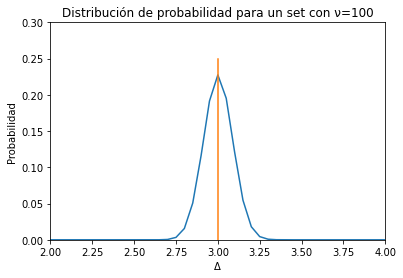

In [62]:
plt.plot(Deltalist,Set[:,nt-1])
plt.plot([delta,delta],[0,0.25],label="Valor real")
plt.title("Distribución de probabilidad para un set con "+"\u03bd="+str(nu))
plt.xlabel("\u0394")
plt.ylabel("Probabilidad")
plt.axis([2,4,0,0.3])
plt.show()

## Bayesian inference method

In [4]:
Deltamean=np.load("Deltamean.npy") #Load data
Varquantum=np.zeros([nsets,nt],float)

for j in range(0,nsets):
    for i in range(0,nt):
        Varquantum[j,i]=(Deltamean[j,i]-delta)**2
        
Deltaquantumlist=np.sum(Deltamean,0)/nsets
Varquantumlist=np.sum(Varquantum,0)/nsets

Sigmaquantumlist=np.sqrt(np.abs(Varquantumlist))

## Maximum Likelihood Estimation

Ignore the error message, it's just due to numerical overflowing

In [5]:
Nmean=np.load("Nmean.npy")
Classicdelta=np.zeros([nsets,nt],float)
Varclassic=np.zeros([nsets,nt],float)
for j in range(0,nsets):
    for i in range(0,nt):
        Classicdelta[j,i]=np.sqrt(2**(2*Nmean[j,i])*np.abs((4*gamma*t[i]*omega**2-8*omega**2*Nmean[j,i]-gamma**2*Nmean[j,i]))/Nmean[j,i])/2**(1+Nmean[j,i])
        Varclassic[j,i]=(Classicdelta[j,i]-delta)**2

Deltaclassiclist=np.sum(Classicdelta,0)/nsets
Varclassiclist=np.sum(Varclassic,0)/nsets
Sigmaclassiclist=np.sqrt(np.abs(Varclassiclist)) 

<ipython-input-5-c0f1c318bf03>:6: RuntimeWarning: invalid value encountered in double_scalars
  Classicdelta[j,i]=np.sqrt(2**(2*Nmean[j,i])*np.abs((4*gamma*t[i]*omega**2-8*omega**2*Nmean[j,i]-gamma**2*Nmean[j,i]))/Nmean[j,i])/2**(1+Nmean[j,i])
<ipython-input-5-c0f1c318bf03>:6: RuntimeWarning: divide by zero encountered in double_scalars
  Classicdelta[j,i]=np.sqrt(2**(2*Nmean[j,i])*np.abs((4*gamma*t[i]*omega**2-8*omega**2*Nmean[j,i]-gamma**2*Nmean[j,i]))/Nmean[j,i])/2**(1+Nmean[j,i])


## Plotting results
The first graph shows both estimations over time with their MSE shaded

<ipython-input-6-9f90f4b1ccad>:5: RuntimeWarning: invalid value encountered in subtract
  plt.fill_between(t,Deltaclassiclist+Sigmaclassiclist,Deltaclassiclist-Sigmaclassiclist,


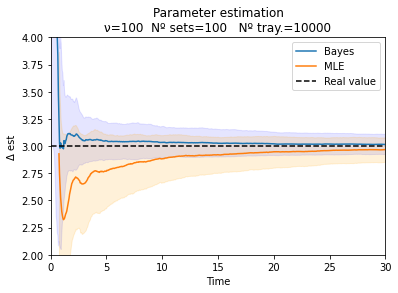

In [6]:
plt.plot(t,Deltaquantumlist,label="Bayes")
plt.fill_between(t,Deltaquantumlist+Sigmaquantumlist,Deltaquantumlist-Sigmaquantumlist,
                facecolor="blue", color="blue", alpha=0.1)
plt.plot(t,Deltaclassiclist,label="MLE")
plt.fill_between(t,Deltaclassiclist+Sigmaclassiclist,Deltaclassiclist-Sigmaclassiclist,
                facecolor="orange", color="orange", alpha=0.15)
plt.plot([t0,tf],[delta,delta],color="k",label="Real value",linestyle="--")
plt.xlabel("Time")
plt.ylabel("\u0394 est")
plt.title("Parameter estimation"+"\n"+"\u03bd="+str(nu)+"  Nº sets="+str(nsets)+"   Nº tray.="+str(Ntraj))
plt.legend()
plt.axis([t0,tf,2,4])
plt.show()

In [7]:
print("Bayesian estimate=",Deltaquantumlist[nt-1]," +- ",Sigmaquantumlist[nt-1])
print("MLE estimate=",Deltaclassiclist[nt-1]," +- ",Sigmaclassiclist[nt-1])

Bayesian estimate= 3.0166849430769833  +-  0.09306297773952409
MLE estimate= 2.9704995901813915  +-  0.11190961905393161


## Comparing with the Fisher information


In [8]:
Sigmafisher=np.zeros(nt,float)
for i in range(0,nt):
    Sigmafisher[i]=np.sqrt((8*omega**2+4*delta**2+gamma**2)**3/(nu*256*gamma*t[i]*omega**2*delta**2))


<ipython-input-8-a0a6f84aaf49>:3: RuntimeWarning: divide by zero encountered in double_scalars
  Sigmafisher[i]=np.sqrt((8*omega**2+4*delta**2+gamma**2)**3/(nu*256*gamma*t[i]*omega**2*delta**2))


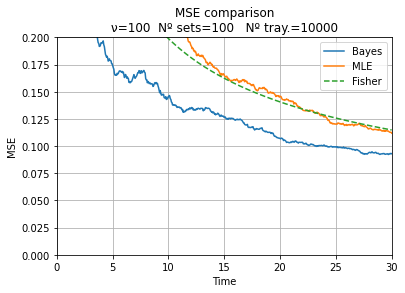

In [10]:
plt.plot(t,Sigmaquantumlist,label="Bayes")
plt.plot(t,Sigmaclassiclist,label="MLE")
plt.plot(t,Sigmafisher,linestyle="--",label="Fisher")
plt.xlabel("Time")
plt.ylabel("MSE")
plt.title("MSE comparison"+"\n"+"\u03bd="+str(nu)+"  Nº sets="+str(nsets)+"   Nº tray.="+str(Ntraj))
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.axis([0,tf,0,0.2])
plt.grid()
plt.show()